In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scprep
from heatgeo.embedding import HeatGeo
from scipy.spatial.distance import squareform, pdist

In [2]:
n_train = 3000

data_unif = np.load('saddle_uniform.npy')
data_gaus = np.load('saddle_gaussian.npy')

In [3]:
data = data_unif
name = 'saddle_uniform'

/gpfs/gibbs/pi/krishnaswamy_smita/xingzhi/.conda_envs/geosink/lib/python3.11/site-packages/graphtools/base.py:165: RuntimeWarning: Cannot perform PCA to 40 dimensions on data with min(n_samples, n_features) = 3
  warnings.warn(


Using s_gd2 for MDS. None


/gpfs/gibbs/pi/krishnaswamy_smita/xingzhi/.conda_envs/geosink/lib/python3.11/site-packages/scprep/plot/utils.py:99: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  fig.tight_layout()


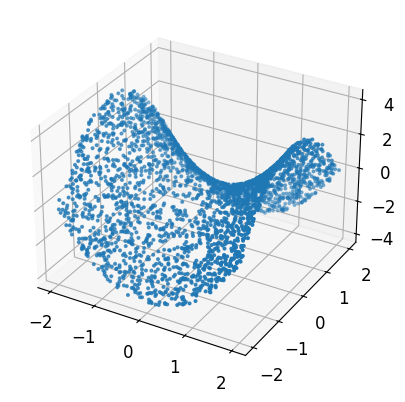

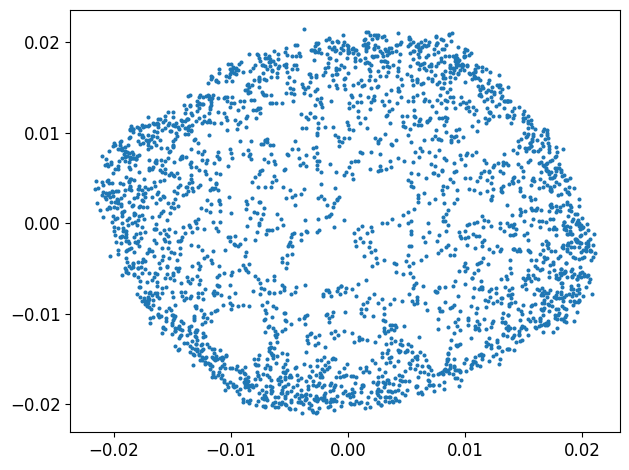

In [4]:
# phate_op = phate.PHATE(n_components=2, n_jobs=-1, knn=10, random_state=42)
# X_phate = phate_op.fit_transform(data)
emb_op = HeatGeo(knn=5)
X_phate = emb_op.fit_transform(data)
emb_op.metric_computation(data)

scprep.plot.scatter3d(data)
scprep.plot.scatter2d(X_phate)

X_pca = data
# dists = squareform(pdist(X_phate))
dists = emb_op.dist
np.random.seed(32)
if data.shape[0] >= n_train:
    train_ids = np.random.choice(data.shape[0], n_train, replace=False)
    is_train = np.zeros(data.shape[0], dtype=bool)
    is_train[train_ids] = True
else:
    is_train = np.ones(data.shape[0], dtype=bool)
# X_approx = np.dot(X_pca, PCs.T) + means
data_dict = dict(
    data=X_pca,
    phate=X_phate,
    dist=dists,
    is_train=is_train,
)
savepath = '.'
np.savez(f'{savepath}/{name}_heatgeo.npz', **data_dict)

In [5]:
data = data_gaus
name = 'saddle_gaussian'

/gpfs/gibbs/pi/krishnaswamy_smita/xingzhi/.conda_envs/geosink/lib/python3.11/site-packages/graphtools/base.py:165: RuntimeWarning: Cannot perform PCA to 40 dimensions on data with min(n_samples, n_features) = 3
  warnings.warn(


Using s_gd2 for MDS. None


/gpfs/gibbs/pi/krishnaswamy_smita/xingzhi/.conda_envs/geosink/lib/python3.11/site-packages/scprep/plot/utils.py:99: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  fig.tight_layout()


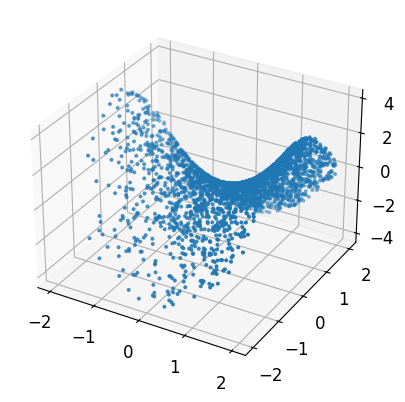

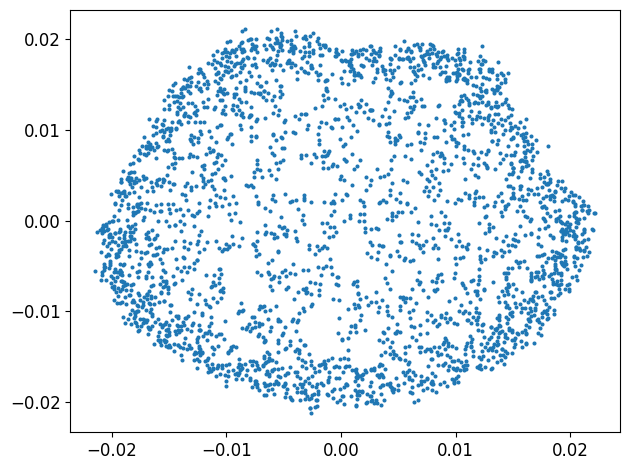

In [6]:
# phate_op = phate.PHATE(n_components=2, n_jobs=-1, knn=10, random_state=42)
# X_phate = phate_op.fit_transform(data)
emb_op = HeatGeo(knn=5)
X_phate = emb_op.fit_transform(data)
emb_op.metric_computation(data)

scprep.plot.scatter3d(data)
scprep.plot.scatter2d(X_phate)

X_pca = data
# dists = squareform(pdist(X_phate))
dists = emb_op.dist
np.random.seed(32)
if data.shape[0] >= n_train:
    train_ids = np.random.choice(data.shape[0], n_train, replace=False)
    is_train = np.zeros(data.shape[0], dtype=bool)
    is_train[train_ids] = True
else:
    is_train = np.ones(data.shape[0], dtype=bool)
# X_approx = np.dot(X_pca, PCs.T) + means
data_dict = dict(
    data=X_pca,
    phate=X_phate,
    dist=dists,
    is_train=is_train,
)
savepath = '.'
np.savez(f'{savepath}/{name}_heatgeo.npz', **data_dict)